In [ ]:
import numpy as np
import matplotlib.pyplot as plt

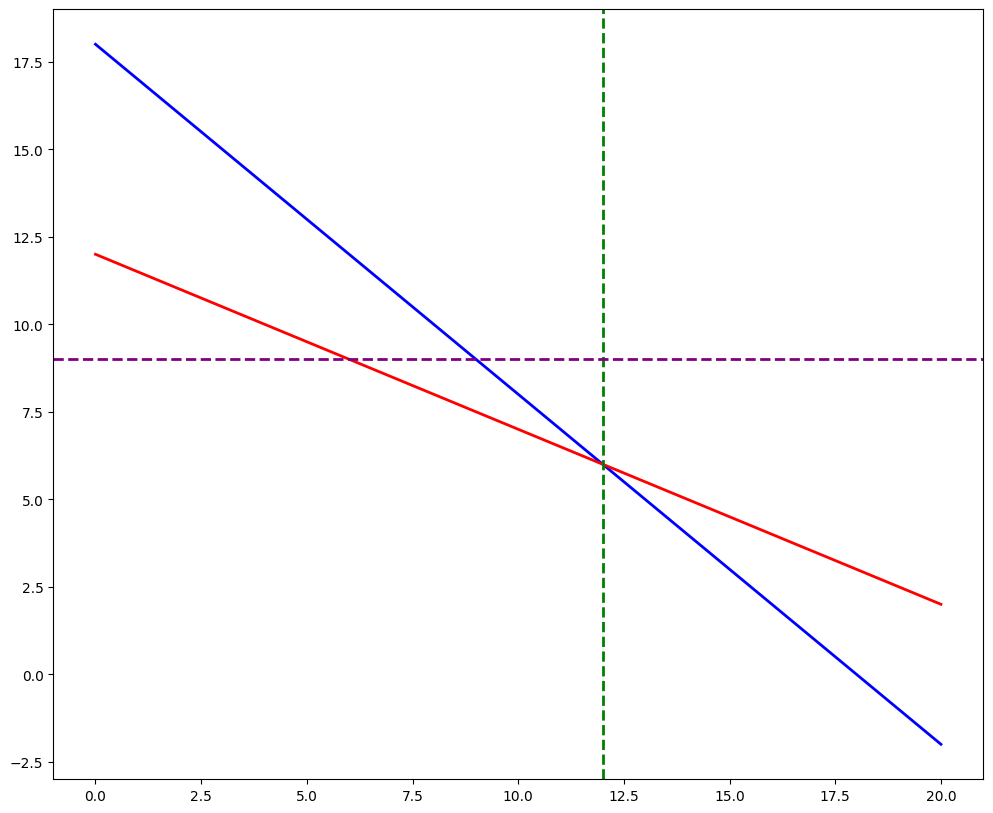

In [54]:
# Configuração do gráfico
plt.figure(figsize=(12, 10))

# Definir o range dos eixos
x1 = np.linspace(0, 20, 400)

# Restrições como equações para plotagem
# 1. x1 + x2 = 18
x2_1 = 18 - x1
# 2. 0.5x1 + x2 = 12  
x2_2 = 12 - 0.5 * x1
# 3. x1 = 12 (vertical)
# 4. x2 = 9 (horizontal)

# Plotar as linhas das restrições
plt.plot(x1, x2_1, 'b-', label='x₁ + x₂ = 18', linewidth=2)
plt.plot(x1, x2_2, 'r-', label='0.5x₁ + x₂ = 12', linewidth=2)
plt.axvline(x=12, color='green', linestyle='--', label='x₁ = 12', linewidth=2)
plt.axhline(y=9, color='purple', linestyle='--', label='x₂ = 9', linewidth=2)

Verificação dos vértices:
Vértice (0, 0): VÁLIDO
Vértice (0, 9): VÁLIDO
Vértice (6, 9): VÁLIDO
Vértice (12, 6): VÁLIDO
Vértice (12, 0): VÁLIDO


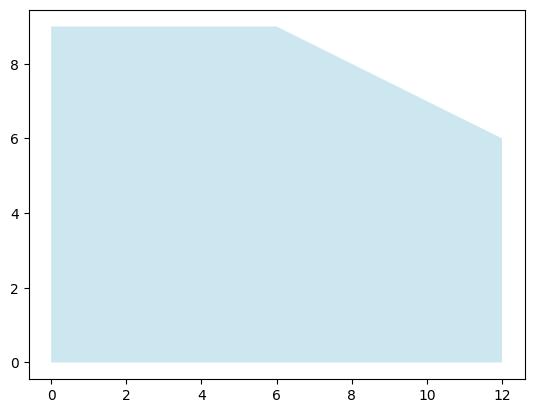

In [56]:
# Vértices CORRETOS da região viável (manual verification)
vertices = [
    (0, 0),    # Origem
    (0, 9),    # Interseção x₂=9 com x₁=0
    (6, 9),    # Interseção x₂=9 com 0.5x₁+x₂=12
    (12, 6),   # Interseção x₁=12 com 0.5x₁+x₂=12
    (12, 0)    # Interseção x₁=12 com x₂=0
]

# Verificar se todos os vértices satisfazem as restrições
print("Verificação dos vértices:")
for v in vertices:
    x1_val, x2_val = v
    valid = (x1_val + x2_val <= 18 + 1e-6 and 
             0.5*x1_val + x2_val <= 12 + 1e-6 and 
             x1_val <= 12 + 1e-6 and 
             x2_val <= 9 + 1e-6 and 
             x1_val >= 0 and x2_val >= 0)
    print(f"Vértice {v}: {'VÁLIDO' if valid else 'INVÁLIDO'}")

# Preencher a região viável
vertices_array = np.array(vertices)
plt.fill(vertices_array[:, 0], vertices_array[:, 1], 'lightblue', alpha=0.6, label='Região Viável')


Avaliação da função objetivo:
Vértice (0, 0): F = 0
Vértice (0, 9): F = 54
Vértice (6, 9): F = 78
Vértice (12, 6): F = 84
Vértice (12, 0): F = 48


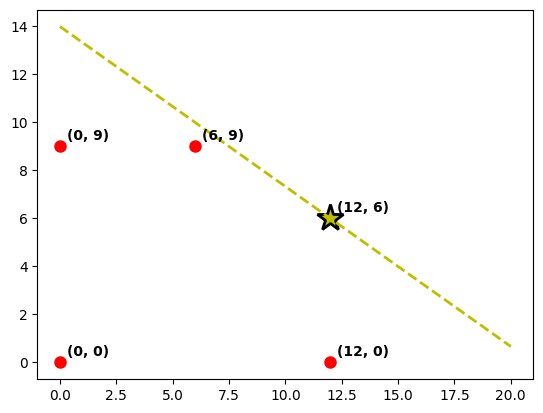

In [57]:
# Marcar todos os vértices
for i, vertex in enumerate(vertices):
    plt.plot(vertex[0], vertex[1], 'ro', markersize=8)
    plt.annotate(f'({vertex[0]}, {vertex[1]})', (vertex[0], vertex[1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=10, weight='bold')

# Avaliar função objetivo em todos os vértices
print("\nAvaliação da função objetivo:")
valores_F = []
for vertex in vertices:
    F_val = 4 * vertex[0] + 6 * vertex[1]
    valores_F.append((vertex, F_val))
    print(f"Vértice {vertex}: F = {F_val}")

# Encontrar o ótimo
vertice_otimo, F_otimo = max(valores_F, key=lambda x: x[1])

# Destacar ponto ótimo
plt.plot(vertice_otimo[0], vertice_otimo[1], 'y*', markersize=20, 
         markeredgecolor='black', markeredgewidth=2, 
         label=f'Ponto Ótimo: ({vertice_otimo[0]}, {vertice_otimo[1]})')

# Adicionar linha de nível da função objetivo no ponto ótimo
x1_line = np.linspace(0, 20, 100)
x2_opt_line = (F_otimo - 4 * x1_line) / 6
plt.plot(x1_line, x2_opt_line, 'y--', linewidth=2, 
         label=f'F(x) = {F_otimo} (Linha de Nível Ótima)')

/tmp/ipykernel_4811/2553085529.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize=11)


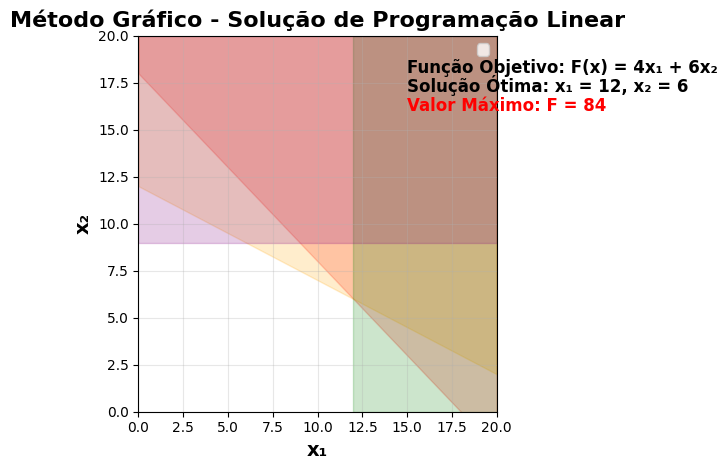


RESULTADO FINAL:
Ponto Ótimo: (x₁, x₂) = (12, 6)
Valor Máximo da Função Objetivo: F = 84
Vértices da Região Viável: [(0, 0), (0, 9), (6, 9), (12, 6), (12, 0)]


In [58]:
# Configurações do gráfico
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('x₁', fontsize=14, weight='bold')
plt.ylabel('x₂', fontsize=14, weight='bold')
plt.title('Método Gráfico - Solução de Programação Linear', fontsize=16, weight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=11)

# Adicionar informações da solução
plt.text(15, 18, 'Função Objetivo: F(x) = 4x₁ + 6x₂', fontsize=12, weight='bold')
plt.text(15, 17, f'Solução Ótima: x₁ = {vertice_otimo[0]}, x₂ = {vertice_otimo[1]}', 
         fontsize=12, weight='bold')
plt.text(15, 16, f'Valor Máximo: F = {F_otimo}', fontsize=12, weight='bold', color='red')

# Destacar as áreas não viáveis
plt.fill_between(x1, x2_1, 20, alpha=0.2, color='red', label='Área Não Viável')
plt.fill_between(x1, x2_2, 20, alpha=0.2, color='orange')
plt.fill_between([12, 20], 0, 20, alpha=0.2, color='green')
plt.fill_between(x1, 9, 20, alpha=0.2, color='purple')

plt.tight_layout()
plt.show()

# Resultado final
print(f"\n{'='*50}")
print("RESULTADO FINAL:")
print(f"{'='*50}")
print(f"Ponto Ótimo: (x₁, x₂) = ({vertice_otimo[0]}, {vertice_otimo[1]})")
print(f"Valor Máximo da Função Objetivo: F = {F_otimo}")
print(f"Vértices da Região Viável: {vertices}")
print(f"{'='*50}")